<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/Copy_of_8_1_4_THEORY_Linear_Regression_extra_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Regression

## 1. One feature

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 500
# 1 feature with n values between -2 and 3
X = np.linspace(-2, 3, n)
# 1 label with n values linearly related with x
y_real = 3*X - 2
# Add noise
y = y_real + 1.0*np.random.randn(n)

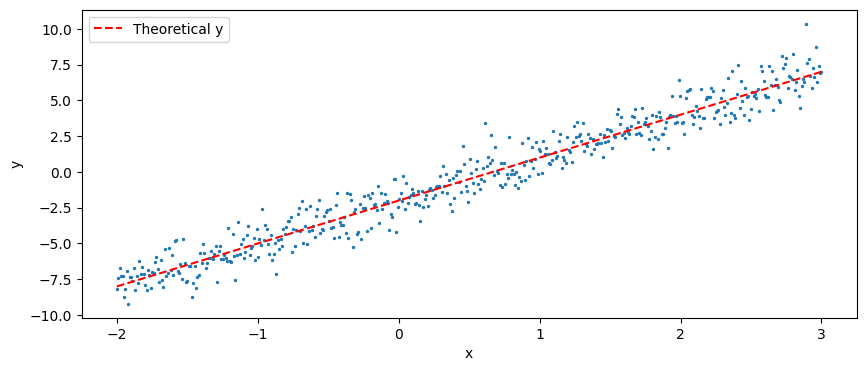

In [ ]:
# Plot the values
plt.figure(figsize=(10, 4))
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Theoretical y', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let's train all the models at once. But before that, let's not forget about `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Let's define and train the models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train);

Let's see what you learned.

Linear regression takes the slope and the intercept.

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[ 3.99115046 -1.88497019] 6.950508475821279


Are they close to the real values?

Just as classifiers obtain decision boundaries that separate the data, regressors obtain curves that try to approximate the data as best as possible. Let's see what these curves look like for each regressor.

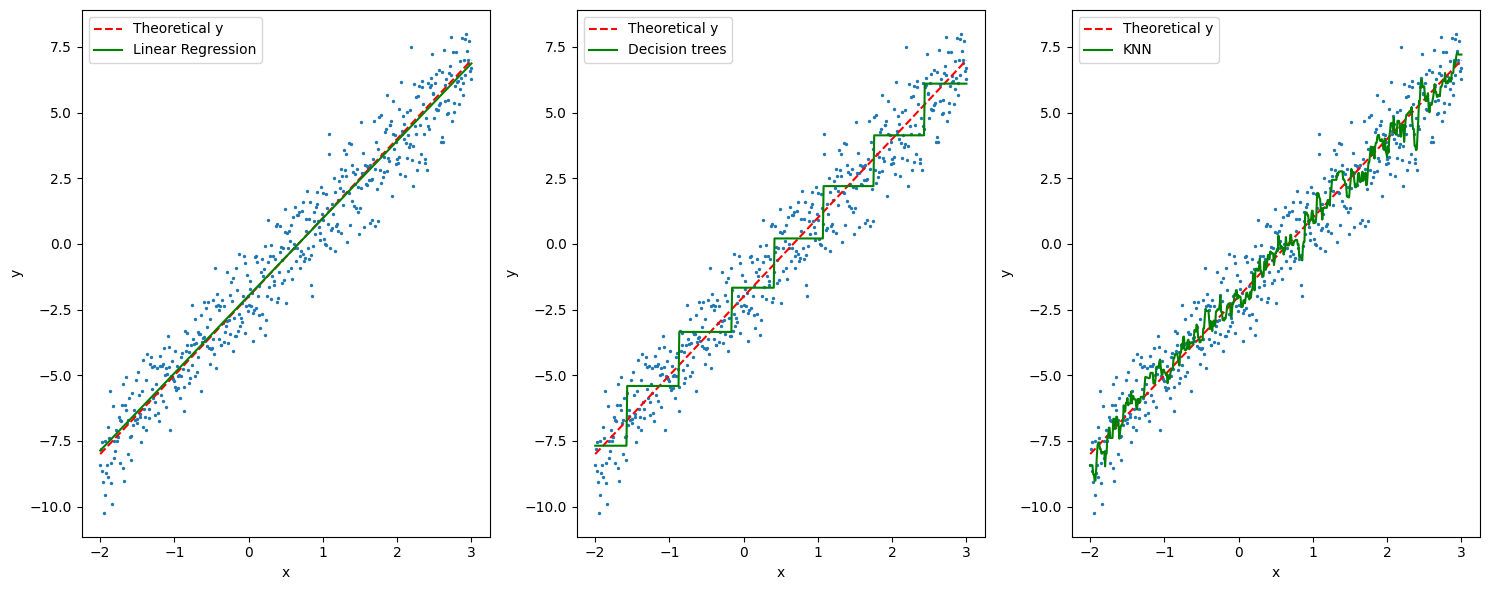

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Theoretical y', c='r')
plt.plot(X, linear_model.predict(X), label='Linear Regression', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Theoretical y', c='r')
plt.plot(X, tree_regressor.predict(X), label='Decision trees', c='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Theoretical y', c='r')
plt.plot(X, knn_regressor.predict(X), label='KNN', c='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Let's now see what the errors obtained look like. We're going to do everything in the same cell, but it has three important components:

1. The calculation of the RMSE (chosen metric, it could be another one) for each set (Train and Test).
1. A scatter plot of $y$ vs $y_{predicted}$ for the Test set.
1. The histogram of the errors ($y - y_{predicted}$) for each set.

Model: Linear Regression
Root mean square error in Train: 0.36576379481835236
Root mean square error in Test: 0.3923667735537498


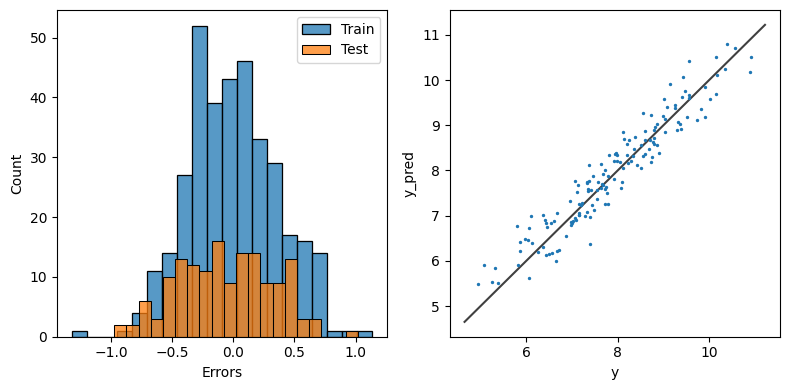

Model: Decision Trees
Root mean square error in Train: 0.48927275605627424
Root mean square error in Test: 0.6162323852045609


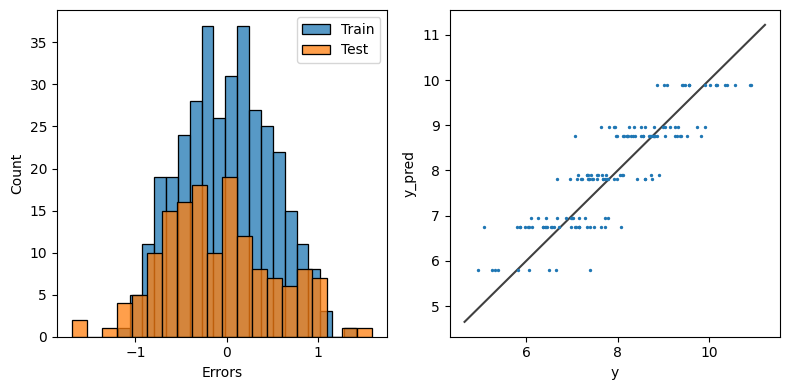

Model: KNN
Root mean square error in Train: 0.26292528055615366
Root mean square error in Test: 0.47660106963973264


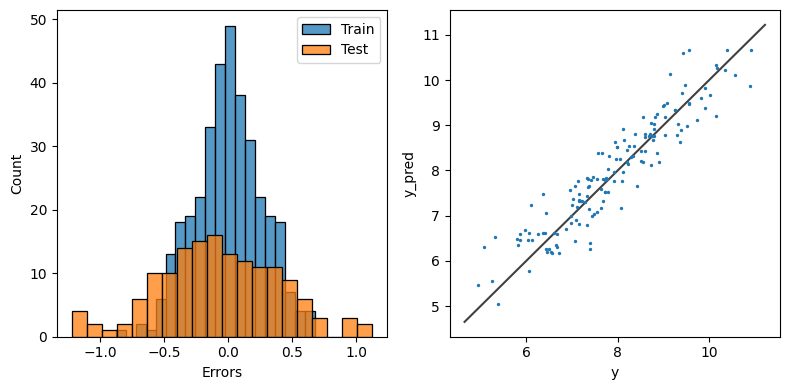

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

models = ['Linear Regression', 'Decision Trees', 'KNN']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Model: {models[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Root mean square error in Train: {rmse_train}')
    print(f'Root mean square error in Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('Errors')
    plt.legend()


    ax = plt.subplot(1, 2, 2)
    ax.scatter(y_test, y_test_pred, s=2)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')

    plt.tight_layout()
    plt.show()

In all cases, something similar happens:
1. The RMSE errors represent the overall error of the regressor. They are similar for both Test and Train, indicating that there is no major overfitting.
1. The error histograms are symmetrical, roughly Gaussian, and similar for both sets. This is an indicator that we are approximating our data correctly.
1. In the $y$ vs $y_{predicted}$ plot for the test set, all the points are close to the diagonal (the $y = x$ relationship), which is what we expect for a good regressor! Also, the error seems to be similar across the range of possible values.

---

## 2. Two attributes

Now, we will replicate the same analysis, but for a linear relationship with two attributes, $y = -3x_1 + 2x_2 + 4$. Again, we will add some noise to make it more realistic.

In [ ]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 4 * x1 - 2 * x2 + 7 + 0.4 * np.random.randn(n)

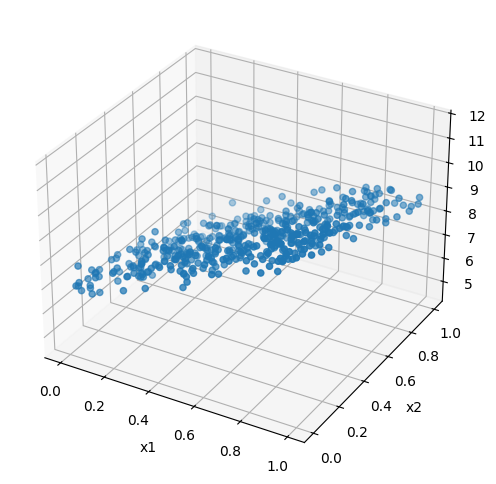

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig=None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y)

Let's create the attributes and do a `train_test_split`

In [ ]:
X = np.vstack((x1, x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


Let's define and train the models

In [ ]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train);

Let's see what they learned.

Linear regression obtains **the slopes** and the intercept

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[ 4.00483407 -2.16583689] 7.087897346510539


In this case, the curve that approximates the data is no longer a straight line, but a surface. The following function helps us to plot it.

In [ ]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min, x2_max, N, regressor, ax=None, fig=None):
    x1 = np.linspace(x1_min, x1_max, N)
    x2 = np.linspace(x2_min, x2_max, N)
    X1, X2 = np.meshgrid(x1, x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(
        X1, X2, Y, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.5
)

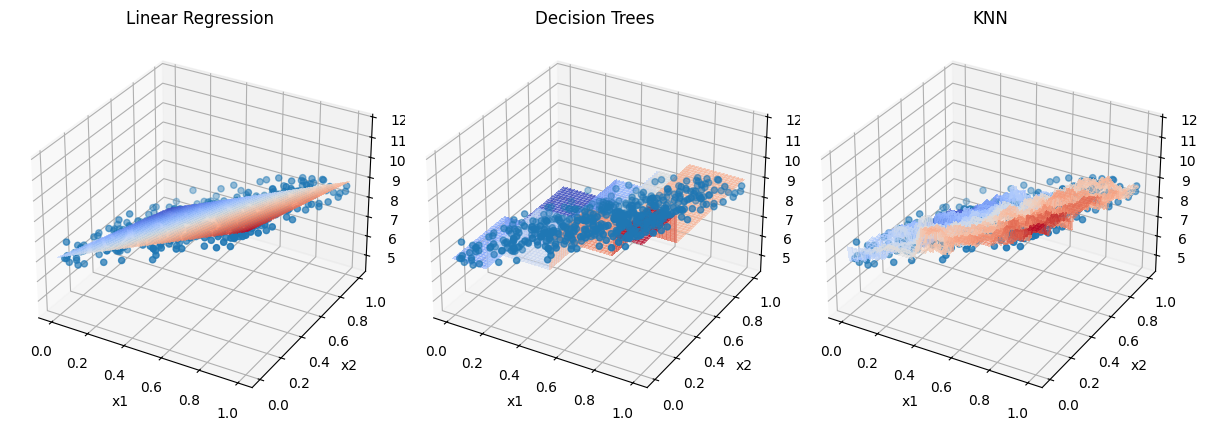

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
plt.title('Linear Regression')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(132, projection='3d')
plt.title('Decision Trees')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('KNN')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()

Model: Linear Regression
Root mean square error in Train: 0.370300687560664
Root mean square error in Test: 0.41154787438203555


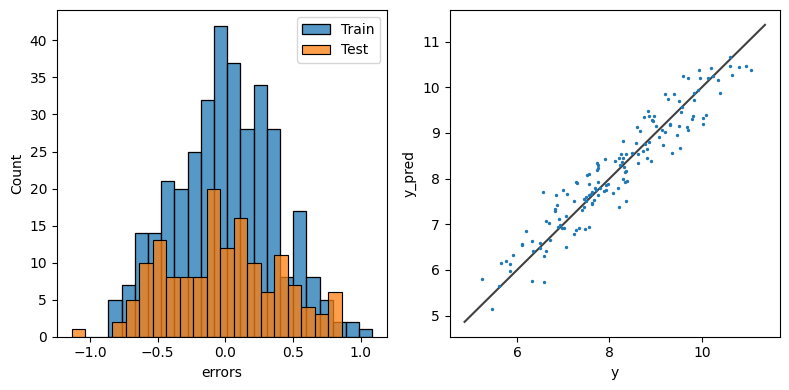

Model: Decision Trees
Root mean square error in Train: 0.5233876443390607
Root mean square error in Test: 0.5966992842564268


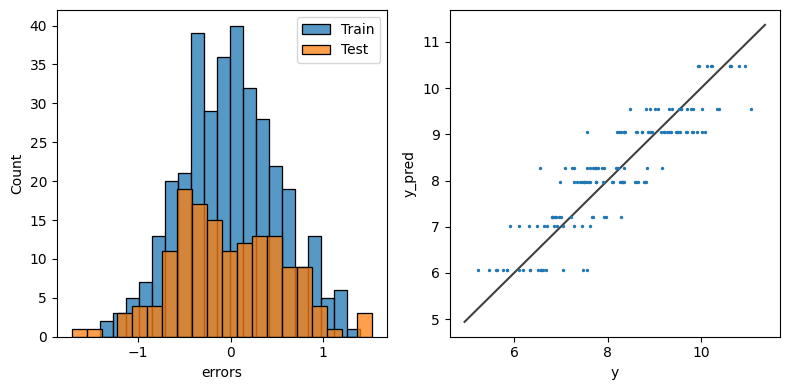

Model: KNN
Root mean square error in Train: 0.2637790080257334
Root mean square error in Test: 0.5272915729673511


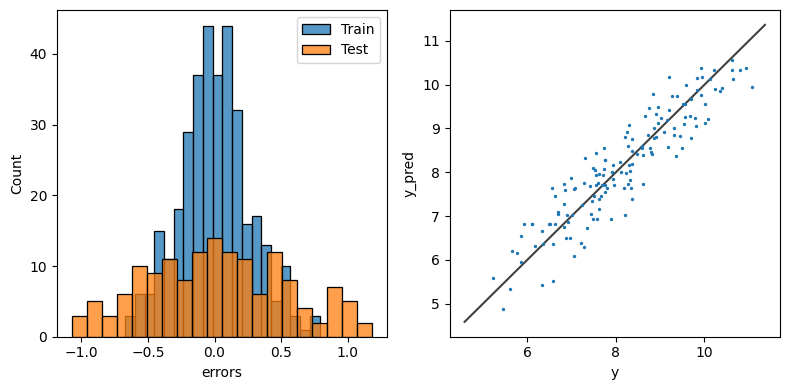

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

models = ['Linear Regression', 'Decision Trees', 'KNN']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Model: {models[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Root mean square error in Train: {rmse_train}')
    print(f'Root mean square error in Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('errors')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')

    plt.tight_layout()
    plt.show()